<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week3/PMA_Code_of_5517759.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1 (a)**

               GDP  Logistics Bill
count      11.0000         11.0000
mean   439381.8182      53727.2727
std    432150.6192      53840.6740
min     33900.0000       5000.0000
25%     78750.0000      10500.0000
50%    223600.0000      27000.0000
75%    844700.0000      99000.0000
max   1189100.0000     160000.0000


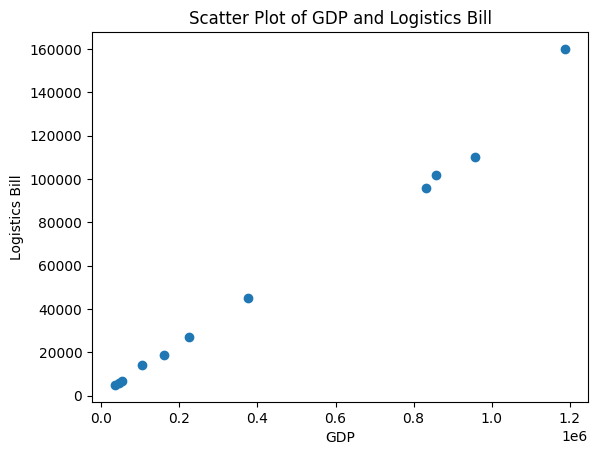

In [ ]:
### Question 1 (a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


data = {
    'GDP': [
        161800,104100,956900,1189100,53400,33900,856800,223600,45300,375700,832600
    ],
    'Logistics Bill': [
        19000,14000,110000,160000,7000,5000,102000,27000,6000,45000,96000
    ]
}
# Creating a DataFrame
df = pd.DataFrame(data)
pd.options.display.float_format = '{:.4f}'.format

## Calculating descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

## Plotting scatter plot
plt.scatter(df['GDP'], df['Logistics Bill'])
plt.xlabel('GDP')
plt.ylabel('Logistics Bill')
plt.title('Scatter Plot of GDP and Logistics Bill')
plt.show()

# **Question1 (b)(C)(e)**

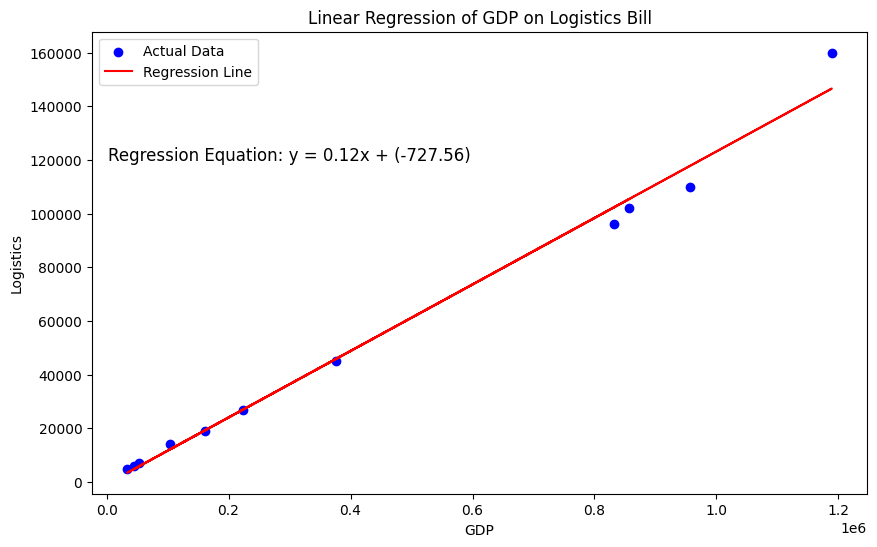

               GDP  Logistics Bill
count      11.0000         11.0000
mean   439381.8182      53727.2727
std    432150.6192      53840.6740
min     33900.0000       5000.0000
25%     78750.0000      10500.0000
50%    223600.0000      27000.0000
75%    844700.0000      99000.0000
max   1189100.0000     160000.0000
Regression Equation: y = 0.12x + (-727.56)
MSE: 27537705.15142748
R^2: 0.9895504051076529
    Fitted_value  Standardized_Res
0     19325.1433           -0.0620
1     12174.0882            0.3479
2    117865.9385           -1.4989
3    146643.6679            2.5452
4      5890.5788            0.2114
5      3473.8445            0.2908
6    105460.0354           -0.6594
7     26984.3323            0.0030
8      4886.7046            0.2122
9     45834.8604           -0.1591
10   102460.8060           -1.2312

Descriptive statistics:
               GDP  Logistics Bill  Fitted_value   Residual  Standardized_Res
count      11.0000         11.0000       11.0000    11.0000           11

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


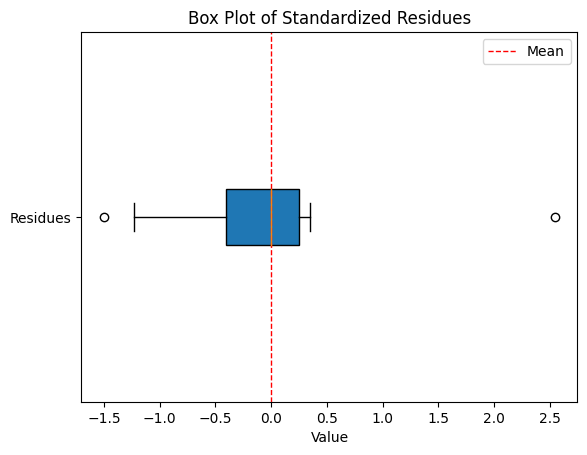

Classes:
   Standart_Residuals  Frequency
0             -0.4879          3
1              0.5231          7
2              1.5342          0
3              2.5452          1 



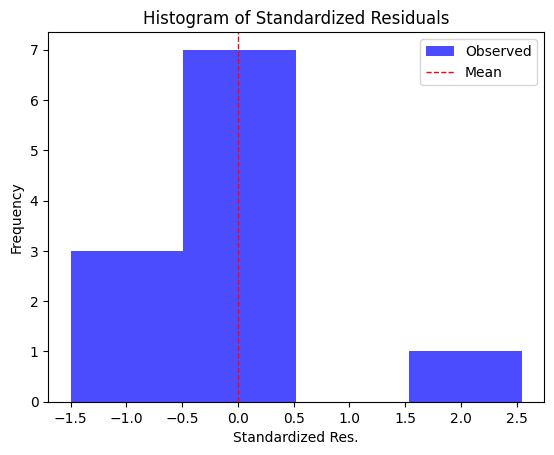

<ipython-input-14-9ba6ca79eda3>:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


     CDF  Bin Frequency  Expected Value
0 0.3209         0.3209          3.5298
1 0.6910         0.3701          4.0716
2 0.9282         0.2372          2.6092
3 0.9924         0.0641          0.7056
4  Sum =         0.9924         11.0000
Chi-Square Table:
       χ^2
0   0.0795
1   2.1063
2   2.6092
3   0.1228
Sum 4.9178
Chi-square Statistic: 4.879710572403493, p-value: 0.0271741753317064


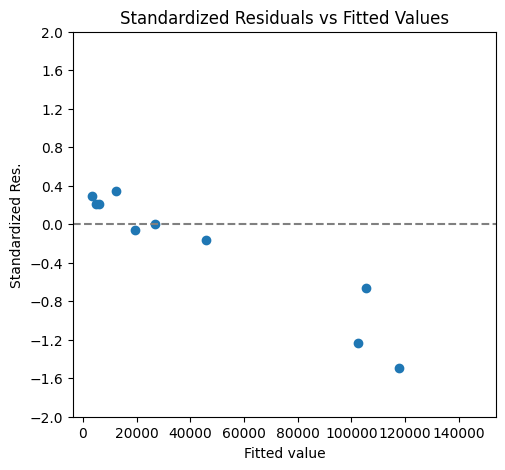

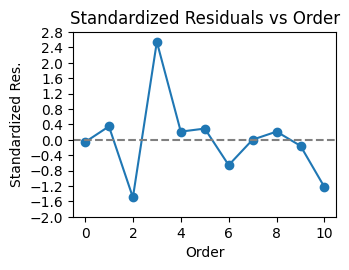

,GDP (x),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound
0,600000,2.2281,6101.5059,13595.0024,60038.5002,73633.5026,87228.5050
1,0,2.2281,6367.4304,14187.5190,-14915.0743,-727.5553,13459.9637


In [ ]:
### Question1 (b)
## Adding a constant to the independent value for statsmodels
X = sm.add_constant(df['GDP'])
y = df['Logistics Bill']

# Creating an Ordinary Least Squares (OLS) regression model with statsmodels library
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Getting the model parameters for the formula
intercept, slope = model.params

# Calculating MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Logistics Bill'], color='blue', label='Actual Data')
plt.plot(df['GDP'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression of GDP on Logistics Bill')
plt.xlabel('GDP')
plt.ylabel('Logistics')
plt.legend()

# Adding the regression equation to the plot
plt.text(2500, 120000, f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})', fontsize=12, color='black')

plt.show()
# Returning the descriptive statistics, the regression equation, MSE, and R-squared value
# descriptive_stats, f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}', mse, r2
print(descriptive_stats)
print(f'Regression Equation: y = {slope:.2f}x + ({intercept:.2f})')

print(f"MSE: {mse}")
print(f"R^2: {r2}")

##regression chart
# Adding a constant to the independent value
X = sm.add_constant(df['GDP'].values)

# Dependent variable
y = df['Logistics Bill'].values

# Creating an OLS regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
regression_summary = model.summary()

# Get detailed tables from summary as DataFrames
tables = model.summary2().tables
regression_statistics_df = pd.DataFrame(tables[0])

regression_summary

## Tests for residuals

### Residual
from scipy.stats import zscore

# Normality test for residuals:
# We will calculate the residuals and their standardized values (z-scores)

# Fitting the model
model = LinearRegression()
model.fit(df[['GDP']], df['Logistics Bill'])

# Adding predictions to the dataframe
df['Fitted_value'] = model.predict(df[['GDP']])
# Residuals
df['Residual'] = df['Logistics Bill'] - df['Fitted_value']

#### Standardized Residuals
df['Standardized_Res'] = zscore(df['Residual'])

# Residual Output Table
residual_output = df[['Fitted_value', 'Standardized_Res']]

# Standardized Residual Descriptive Statistics
std_res_desc = df['Standardized_Res'].describe()
pd.options.display.float_format = '{:.4f}'.format

print(residual_output)

print("\nDescriptive statistics:")
std_res_desc

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Using describe() to get most of the descriptive statistics
desc_stats = df.describe()
print(desc_stats)


# Calculating the boundaries for outliers
Q1 = df['Standardized_Res'].quantile(0.25)
Q3 = df['Standardized_Res'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")


## Normality test
# Calculate mean and standard deviation
mean = df['Standardized_Res'].mean()
std_dev = df['Standardized_Res'].std()

# Calculate Sturges' number of bins
n = len(df)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(df['Standardized_Res']) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(df['Standardized_Res'], bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(df['Standardized_Res'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Standardized Residues')
plt.xlabel('Value')
plt.yticks([1], ['Residues'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Standart_Residuals': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized, ddof=2)
hist_df.Standart_Residuals = hist_df.Standart_Residuals + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(df['Standardized_Res'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Res.')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Display the table
print(table_df)
print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

from scipy import stats

# We need to calculate the standard error of the prediction and the prediction intervals
# Based on the provided parameters and spending values for predictions

# Parameters
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = np.mean(df['GDP'])  # Mean of GDP
s_x = np.std(df['GDP'])  # Standard deviation of GDP
n = len(df)  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-1)  # t-value for 95% confidence

#GDP values for which we want to calculate prediction intervals
GDP_values = [600000,0]

# Data for the model
X = df['GDP'].values.reshape(-1, 1)
y = df['Logistics Bill'].values


# Fitting the model
model = LinearRegression().fit(X, y)

# Residual standard error (RSE)
residuals = y - model.predict(X)
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Define function to calculate prediction interval
def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_mean)**2) / ((s_x**2) * (n - 1)))
    prediction = model.predict([[x_new]])[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

# Calculate prediction intervals for each GDP value
predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in GDP_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=GDP_values)
# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'GDP (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

# Prepare the residual plots again with the line connecting points on the second scatter plot
plt.figure(figsize=(12, 5))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(df['Fitted_value'], df['Standardized_Res'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Standardized Res.')
plt.title('Standardized Residuals vs Fitted Values')

plt.ylim(-2.0,2.0)
plt.yticks(np.arange(-2.0, 2.1, 0.4))

plt.show()
# Residuals vs Order of data with line connecting points
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Standardized_Res'], marker='o', linestyle='-')  # Line added here
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Order')
plt.ylabel('Standardized Res.')
plt.title('Standardized Residuals vs Order')

plt.ylim(-2.0,2.0)
plt.yticks(np.arange(-2.0, 3.1, 0.4))

plt.tight_layout()
plt.show()

# Show the updated prediction table
prediction_table.reset_index().rename(columns={'index': 'GDP (x)'})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


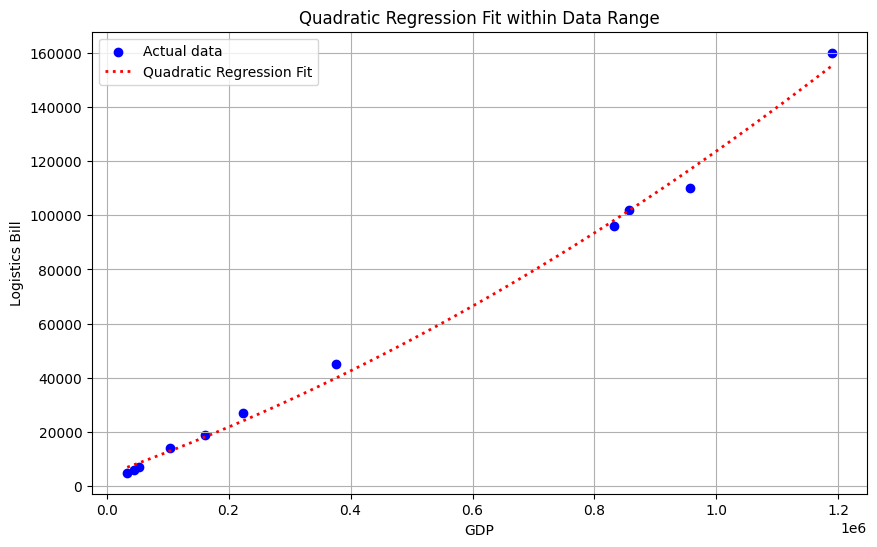

r^2= 0.9957553642468657
y = 0.0000000394x² + (0.0801)x + (4256.8436)
        GDP    GDP_squared  Logistics Bill
0    161800    26179240000           19000
1    104100    10836810000           14000
2    956900   915657610000          110000
3   1189100  1413958810000          160000
4     53400     2851560000            7000
5     33900     1149210000            5000
6    856800   734106240000          102000
7    223600    49996960000           27000
8     45300     2052090000            6000
9    375700   141150490000           45000
10   832600   693222760000           96000
               GDP        GDP_squared  Logistics Bill
count      11.0000            11.0000         11.0000
mean   439381.8182  362832889090.9091      53727.2727
std    432150.6192  493182825258.1115      53840.6740
min     33900.0000    1149210000.0000       5000.0000
25%     78750.0000    6844185000.0000      10500.0000
50%    223600.0000   49996960000.0000      27000.0000
75%    844700.0000  713664500000.0000

In [ ]:
### Question 1 (b) Quadratic Regression Fit
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


data = {
    'GDP': [
        161800,104100,956900,1189100,53400,33900,856800,223600,45300,375700,832600
    ],
    'Logistics Bill': [
        19000,14000,110000,160000,7000,5000,102000,27000,6000,45000,96000
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the features and target
X = df[['GDP']]
y = df['Logistics Bill']  # Use a Series instead of DataFrame

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


# Add a constant to the features for the intercept
X_poly= sm.add_constant(X_poly)
# Fit the model using Ordinary Least Squares
model = sm.OLS(y, X_poly).fit()

# Predictions
y_pred = model.predict(X_poly)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Getting the model parameters for the formula
const, x1,x2 = model.params

# Since coefs will have three values including the coefficient for the intercept term
equation = f'y = {x2:.10f}x² + ({x1:.4f})x + ({const:.4f})'

# Prepare the range for plotting
x_range = np.linspace(X['GDP'].min(), X['GDP'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(x_range, y_range_pred, color='red', linestyle=':', linewidth=2, label='Quadratic Regression Fit')
plt.title('Quadratic Regression Fit within Data Range')
plt.xlabel('GDP')
plt.ylabel('Logistics Bill')
#plt.text(500, 100, equation, fontsize=12)  # Display the equation on the plot
plt.legend()
plt.grid(True)
plt.show()
# Calculate the square of GDP after model fitting to avoid affecting the model
df['GDP_squared'] = df['GDP']**2

pd.options.display.float_format = '{:.4f}'.format

print("r^2=",r2)
print(equation)
df2=pd.DataFrame()
df2['GDP']=df['GDP']
df2['GDP_squared']=df['GDP_squared']
df2['Logistics Bill']=df['Logistics Bill']
print(df2)

# Calculate descriptive statistics for GDP squared
print(df2.describe())

# **Question2 (i) (a)**



In [ ]:
### Introduce Dataframe

from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.read_excel('Used for test.xlsx', header=None)

data.columns = ['fill', 'carbonation', 'line_speed']
column1_data = data['fill']
column2_data = data['carbonation']
column3_data = data['line_speed']
print(data)

Saving Used for test.xlsx to Used for test (2).xlsx
     fill  carbonation  line_speed
0  0.4000       0.1000         210
1  2.0000       0.1000         210
2  3.0000       0.1000         210
3  1.7000       0.1000         210
4  1.8000       0.1000         210
5  1.5000       0.1200         210
6  2.0000       0.1200         210
7  2.8000       0.1200         210
8  2.1000       0.1200         210
9  2.0000       0.1200         210
10 0.5000       0.1000         240
11 2.0000       0.1000         240
12 0.9000       0.1000         240
13 1.9000       0.1000         240
14 6.0000       0.1000         240
15 3.4000       0.1200         240
16 2.1000       0.1200         240
17 0.6000       0.1200         240
18 4.5000       0.1200         240
19 1.6000       0.1200         240
20 4.7000       0.1000         270
21 3.4000       0.1000         270
22 1.2000       0.1000         270
23 3.1000       0.1000         270
24 4.3000       0.1000         270
25 4.4000       0.1200         270
26 

       linespeed
count    20.0000
mean      2.7200
std       1.5409
min       0.4000
25%       1.7750
50%       2.5000
75%       3.6500
max       6.0000
Box Plot Values:
Q1: 1.775, Q3: 3.65, IQR: 1.875
Lower Bound for Outliers: -1.0375
Upper Bound for Outliers: 6.4625

Rounded Number of classes: 5
class Range: 1.1199999999999999


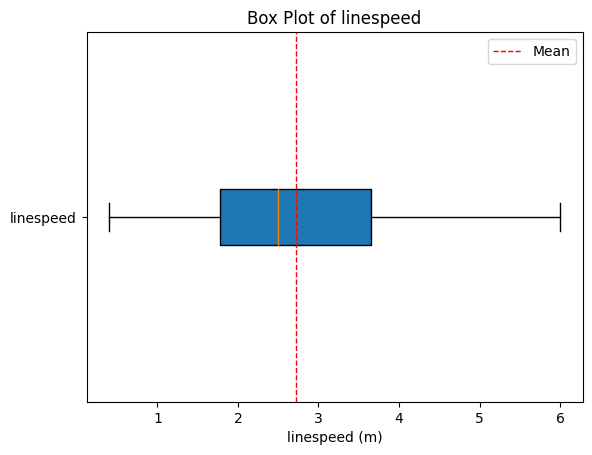

Classes:
   linespeed  Frequency
0     1.5200          4
1     2.6400          7
2     3.7600          4
3     4.8800          3
4     6.0000          2 



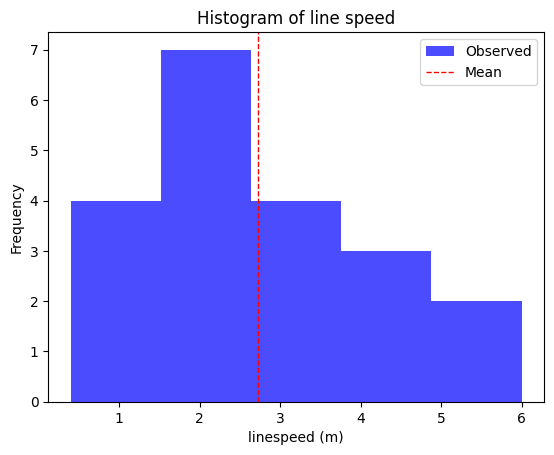

Chi-Square Table:
       χ^2
0   0.0299
1   0.6031
2   0.3706
3   0.0443
4   0.4094
Sum 1.4574
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 1.4574043423505951, p-value: 0.48977654051069597


<ipython-input-21-90361a6e00b6>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.2181,0.2181,4.3611
1,0.4793,0.2612,5.2248
2,0.7501,0.2708,5.4169
3,0.9195,0.1694,3.3874
4,0.9834,0.0638,1.2769
5,Sum =,0.9834,20.0000


In [ ]:
# Normality test for the group with 10% carbonation
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Sample interval data
linespeed_data = np.array([0.4,2.0,3,1.7,1.8,0.5,2,0.9,1.9,6,4.7,3.4,1.2,3.1,4.3,3.6,2.6,2.4,3.8,5.1])
linespeed_df = pd.DataFrame(linespeed_data, columns=['linespeed'])
desc_stats = linespeed_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = linespeed_df['linespeed'].quantile(0.25)
Q3 = linespeed_df['linespeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(linespeed_data)
std_dev = np.std(linespeed_data, ddof=1)

# Calculate Sturges' number of bins
n = len(linespeed_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(linespeed_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(linespeed_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)

# Box plot
plt.boxplot(linespeed_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of linespeed')
plt.xlabel('linespeed (m)')
plt.yticks([1], ['linespeed'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'linespeed': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.linespeed=hist_df.linespeed+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(linespeed_data, bins = bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of line speed')
plt.xlabel('linespeed (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

       linespeed
count    20.0000
mean      3.0050
std       1.1260
min       0.6000
25%       2.0750
50%       3.2500
75%       3.9000
max       4.5000
Box Plot Values:
Q1: 2.075, Q3: 3.9, IQR: 1.8249999999999997
Lower Bound for Outliers: -0.6624999999999996
Upper Bound for Outliers: 6.637499999999999

Rounded Number of classes: 5
class Range: 0.78


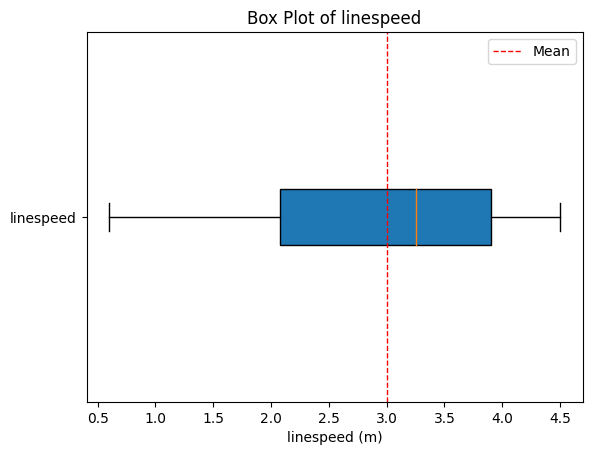

Classes:
   linespeed  Frequency
0     1.3800          1
1     2.1600          6
2     2.9400          2
3     3.7200          5
4     4.5000          6 



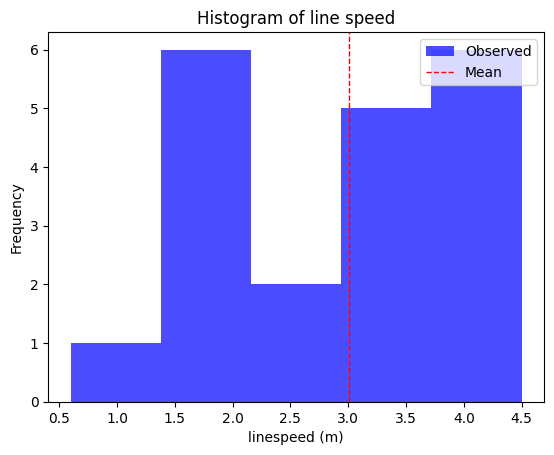

Chi-Square Table:
       χ^2
0   0.1610
1   2.8818
2   1.8082
3   0.0082
4   1.9638
Sum 6.8230
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 6.82297337073213, p-value: 0.049179777035176814


<ipython-input-20-b5b5bdfc5d42>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.0745,0.0745,1.4897
1,0.2265,0.1520,3.0401
2,0.4770,0.2505,5.0098
3,0.7373,0.2603,5.2060
4,0.9079,0.1706,3.4116
5,Sum =,0.9079,20.0000


In [ ]:
# Normality test for the group with 12% carbonation
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Sample interval data
linespeed_data = np.array([1.5,2.0,2.8,2.1,2,3.4,2.1,0.6,4.5,1.6,4.4,4.2,3.2,3.7,2.9,4.3,3.3,4.2,3.8,3.5])
linespeed_df = pd.DataFrame(linespeed_data, columns=['linespeed'])
desc_stats = linespeed_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = linespeed_df['linespeed'].quantile(0.25)
Q3 = linespeed_df['linespeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(linespeed_data)
std_dev = np.std(linespeed_data, ddof=1)

# Calculate Sturges' number of bins
n = len(linespeed_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(linespeed_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(linespeed_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)

# Box plot
plt.boxplot(linespeed_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of linespeed')
plt.xlabel('linespeed (m)')
plt.yticks([1], ['linespeed'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'linespeed': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.linespeed=hist_df.linespeed+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(linespeed_data, bins = bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of line speed')
plt.xlabel('linespeed (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

In [ ]:
### F-test

# Calculating variances
group1 = data[data['carbonation']==0.1]['fill']
group2 = data[data['carbonation']==0.12]['fill']
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)
mean_1 = np.mean(group1)
mean_2 = np.mean(group2)

# Calculating the F-test statistic
f_value = variance1/variance2
print(f_value)
# Interpreting the result
if f_value > 1:
    print("Variance of group1 is greater than group2")
else:
    print("Variance of group2 is greater than group1")

df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)
print(mean_1,mean_2)

1.8726831192013118
Variance of group1 is greater than group2
Degree of freedom 1: 19
Degree of freedom 2: 19
F-statistic: 1.8726831192013118
p-value: 0.9096787931137365
2.7199999999999998 3.005


In [ ]:
### Two-way ANOVA with replication
def anova_interaction():

    # Determine the ANOVA with interaction
    formula = 'fill ~ C(carbonation) + C(line_speed) + C(carbonation):C(line_speed)'
    lm = ols(formula, data).fit()
    anovaResults = anova_lm(lm)
    # --- >>> STOP stats <<< ---
    print(anovaResults)

    return anovaResults['F'].iloc[0]

if __name__ == '__main__':
    anova_interaction()

                                  df  sum_sq  mean_sq      F  PR(>F)
C(carbonation)                1.0000  0.8123   0.8123 0.5497  0.4639
C(line_speed)                 3.0000 21.8748   7.2916 4.9342  0.0063
C(carbonation):C(line_speed)  3.0000  0.0387   0.0129 0.0087  0.9989
Residual                     32.0000 47.2880   1.4777    NaN     NaN


# **Question 2 （ii)**

In [ ]:
### Question2(ii)(b)
from scipy.stats import poisson
p_x = poisson.pmf(k=2, mu=1.5)
print(p_x)

0.25102143016698353


In [ ]:
### Question2(ii)(c)
P_x_0 = poisson.pmf(k=0, mu=1.5)
P_x_1 = poisson.pmf(k=1, mu=1.5)
P_less_than_2 = P_x_0 + P_x_1
print(P_less_than_2)

0.5578254003710745


In [ ]:
### Question2(ii)(d)
P_x_square = P_x_0 ** 3
print(P_x_square)

0.011108996538242304


# **Question 3 (i)**

In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.read_excel('PMA Q3.xlsx', header=None)
data.columns = ['Computer_assisted learning', 'Group_based learning']
column1_data = data['Computer_assisted learning']
column2_data = data['Group_based learning']
print(data)

Saving PMA Q3.xlsx to PMA Q3 (2).xlsx
    Computer_assisted learning  Group_based learning
0                      19.4000               18.7000
1                      20.7000               24.4000
2                      21.8000               19.3000
3                      14.4000               15.6000
4                      16.1000               18.0000
5                      16.8000               21.7000
6                      14.7000               27.0000
7                      16.7000               13.8000
8                      19.3000               18.0000
9                      16.8000               20.8000
10                     17.7000               17.1000
11                     19.8000               28.2000


count   12.0000
mean    17.8500
std      2.3446
min     14.4000
25%     16.5500
50%     17.2500
75%     19.5000
max     21.8000
Name: Computer_assisted learning, dtype: float64
Box Plot Values:
Q1: 16.55, Q3: 19.5, IQR: 2.9499999999999993
Lower Bound for Outliers: 12.125000000000002
Upper Bound for Outliers: 23.924999999999997

Rounded Number of classes: 4
class Range: 1.85


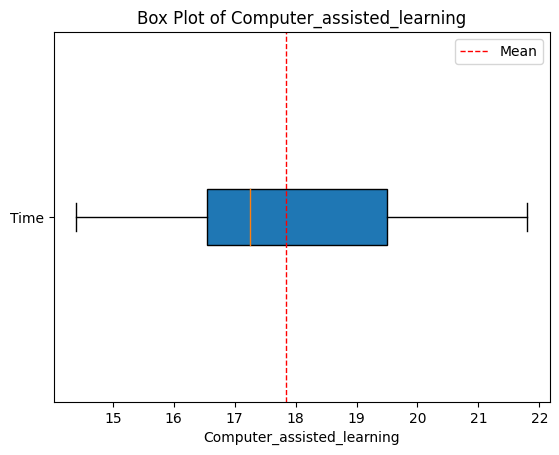

Classes:
   Computer_assisted_learning  Frequency
0                     16.2500          3
1                     18.1000          4
2                     19.9500          3
3                     21.8000          2 



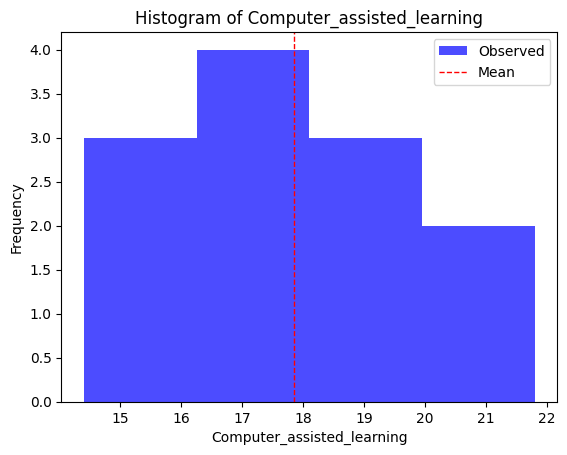

Chi-Square Table:
       χ^2
0   0.0003
1   0.0599
2   0.0220
3   0.0651
Sum 0.1472
Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 0.1472239976217754, p-value: 0.7344875091431478


<ipython-input-36-c963d1102d24>:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.2475,0.2475,2.9699
1,0.5425,0.2950,3.5396
2,0.8148,0.2723,3.2679
3,0.9540,0.1392,1.6703
4,Sum =,0.9540,12.0000


In [ ]:
### normality test
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


Computer_assisted_learning = data['Computer_assisted learning']

# Using describe() to get most of the descriptive statistics
desc_stats = Computer_assisted_learning.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = Computer_assisted_learning.quantile(0.25)
Q3 = Computer_assisted_learning.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(Computer_assisted_learning)
std_dev = np.std(Computer_assisted_learning, ddof=1)

# Calculate Sturges' number of bins
n = len(Computer_assisted_learning)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(Computer_assisted_learning)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(Computer_assisted_learning, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(Computer_assisted_learning, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Computer_assisted_learning')
plt.xlabel('Computer_assisted_learning')
plt.yticks([1], ['Time'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Computer_assisted_learning': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Computer_assisted_learning=hist_df.Computer_assisted_learning+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(Computer_assisted_learning, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Computer_assisted_learning')
plt.xlabel('Computer_assisted_learning')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

count   12.0000
mean    20.2167
std      4.4206
min     13.8000
25%     17.7750
50%     19.0000
75%     22.3750
max     28.2000
Name: Group_based learning, dtype: float64
Box Plot Values:
Q1: 17.775, Q3: 22.375, IQR: 4.600000000000001
Lower Bound for Outliers: 10.874999999999996
Upper Bound for Outliers: 29.275000000000002

Rounded Number of classes: 4
class Range: 3.5999999999999996


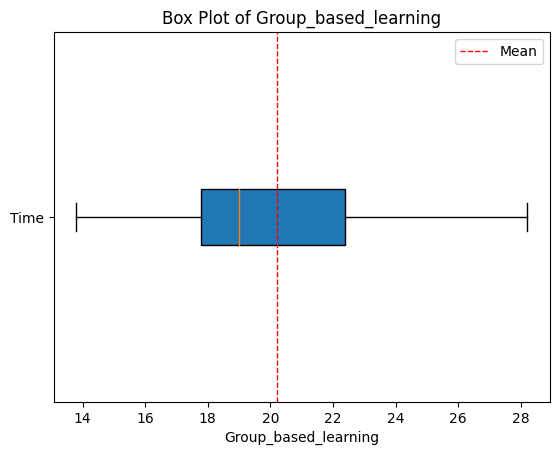

Classes:
   Group_based_learning  Frequency
0               17.4000          3
1               21.0000          5
2               24.6000          2
3               28.2000          2 



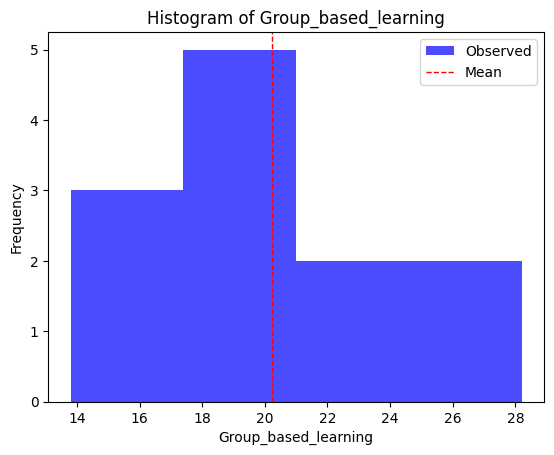

Chi-Square Table:
       χ^2
0   0.0066
1   0.4569
2   0.4670
3   0.1644
Sum 1.0949
Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 1.0949045453522597, p-value: 0.3075927431787146


<ipython-input-37-9d91a4aabd3d>:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.2620,0.2620,3.1441
1,0.5703,0.3083,3.6998
2,0.8393,0.2690,3.2277
3,0.9645,0.1252,1.5029
4,Sum =,0.9645,12.0000


In [ ]:
### normality test for Self learning
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


Group_based_learning = data['Group_based learning']

# Using describe() to get most of the descriptive statistics
desc_stats = Group_based_learning.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = Group_based_learning.quantile(0.25)
Q3 = Group_based_learning.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(Group_based_learning )
std_dev = np.std(Group_based_learning, ddof=1)
# Calculate Sturges' number of bins
n = len(Group_based_learning )
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(Group_based_learning)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(Group_based_learning, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(Group_based_learning, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Group_based_learning')
plt.xlabel('Group_based_learning')
plt.yticks([1], ['Time'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Group_based_learning': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Group_based_learning = hist_df.Group_based_learning+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(Group_based_learning, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Group_based_learning')
plt.xlabel('Group_based_learning')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)
# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

In [ ]:
### F-test

# Calculating variances
group1 = Computer_assisted_learning
group2 = Group_based_learning
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)
mean1 = np.mean(group1)
mean2 = np.mean(group2)

# Calculating the F-test statistic
f_value = variance1/variance2
print(f_value)
# Interpreting the result
if f_value > 1:
    print("Variance of group1 is greater than group2")
else:
    print("Variance of group2 is greater than group1")

df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)
print(mean1,mean2)

0.2813125125994387
Variance of group2 is greater than group1
Degree of freedom 1: 11
Degree of freedom 2: 11
F-statistic: 0.2813125125994387
p-value: 0.02306409344872111
17.850000000000005 20.216666666666665


In [ ]:
# Python code to perform a two-sample t-test

# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats


# Descriptive statistics
desc_stats_1 = {
    'Mean': np.mean(data['Computer_assisted learning']),
    'Variance': np.var(data['Computer_assisted learning'], ddof=1),
    'Observations': len(data['Computer_assisted learning'])
}

desc_stats_2 = {
    'Mean': np.mean(data['Group_based learning']),
    'Variance': np.var(data['Group_based learning'], ddof=1),
    'Observations': len(data['Group_based learning'])
}
# Perform two-sample t-test
t_stat, p_value_two_tail = stats.ttest_ind(data['Computer_assisted learning'], data['Group_based learning'], equal_var=True)
df = len(data['Computer_assisted learning']) + len(data['Group_based learning']) - 2
p_value_one_tail = p_value_two_tail / 2
pooled_variance = ((len(data['Computer_assisted learning']) - 1) * desc_stats_1['Variance'] + (len(data['Group_based learning']) - 1) * desc_stats_2['Variance']) / df

# t critical values for one-tail and two-tail
t_critical_one_tail = stats.t.ppf(1 - 0.05, df)
t_critical_two_tail = stats.t.ppf(1 - 0.025, df)

# Compile descriptive statistics into a DataFrame for display
desc_stats_df = pd.DataFrame([desc_stats_1, desc_stats_2], index=['Computer_assisted learning. (s)', 'Group_based learning. (s)']).T
desc_stats_df.loc['Pooled Variance', :] = pooled_variance
#desc_stats_df.loc['Hypothesized Mean Difference', :] = 0
desc_stats_df.loc['df', :] = df
desc_stats_df.loc['t Stat', 'Computer_assisted learning. (s)'] = t_stat
desc_stats_df.loc['P(T<=t) one-tail', 'Computer_assisted learning. (s)'] = p_value_one_tail
desc_stats_df.loc['t Critical one-tail', 'Computer_assisted learning. (s)'] = t_critical_one_tail
desc_stats_df.loc['P(T<=t) two-tail', 'Computer_assisted learning. (s)'] = p_value_two_tail
desc_stats_df.loc['t Critical two-tail', 'Computer_assisted learning. (s)'] = t_critical_two_tail

# Convert the DataFrame to display float values without scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

desc_stats_df

,Computer_assisted learning. (s),Group_based learning. (s)
Mean,17.8500,20.2167
Variance,5.4973,19.5415
Observations,12.0000,12.0000
Pooled Variance,12.5194,12.5194
df,22.0000,22.0000
t Stat,-1.6384,NaN
P(T<=t) one-tail,0.0578,NaN
t Critical one-tail,1.7171,NaN
P(T<=t) two-tail,0.1156,NaN
t Critical two-tail,2.0739,NaN


# **Question 3 (ii)**

In [ ]:
### (a)
import scipy.stats as st
from scipy.stats import norm

Z_value_upper = (44.175 - 46.5) / (1.017 ** 0.5)
Z_value_lower = (44.175 - 41.5)/(1.017 ** 0.5)

print(Z_value_upper,Z_value_lower)

p_value_1 = norm.sf(abs(Z_value_upper))
p_value_2 = norm.sf(abs(Z_value_lower))
print("P-value:", p_value_1,p_value_2)
print(p_value_1+p_value_2)

-2.30548595457133 2.65254835633475
P-value: 0.010569686241390106 0.003994334205033778
0.014564020446423884


In [ ]:
### (b)
from scipy.stats import t
confidence_level1 = 1 - p_value_1
confidence_level2 = 1 - p_value_2
sample_size = 100

# Calculate T value
T_value1 = t.ppf(confidence_level1, sample_size - 1)
T_value2 = t.ppf(confidence_level1, sample_size - 1)
upper_bound = 44.175 + (T_value1*(1.017**0.5)/10)
lower_bound = 44.175 - (T_value2*(1.017**0.5)/10)
print(upper_bound, lower_bound)
print(T_value1, T_value2)

44.41126515720508 43.938734842794915
2.342821511788818 2.342821511788818


In [ ]:
### (c)
from scipy.stats import t

confidence_level = 1-0.05/2
sample_size = 100

# 计算双尾置信区间的t值

t_value = t.ppf(confidence_level, sample_size - 1)
upper_bound = (t_value*(1.017**0.5)/10) + 44.175
lower_bound = 44.175 - (t_value*(1.017**0.5)/10)

print("Two-tailed T-value for 95% confidence level:", t_value)
print(upper_bound, lower_bound)

Two-tailed T-value for 95% confidence level: 1.9842169515086827
44.37510117186402 43.97489882813598
